In [1]:
import torch, time
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = torch.linspace(0,900,800)
x

tensor([  0.0000,   1.1264,   2.2528,   3.3792,   4.5056,   5.6320,   6.7584,
          7.8849,   9.0113,  10.1377,  11.2641,  12.3905,  13.5169,  14.6433,
         15.7697,  16.8961,  18.0225,  19.1489,  20.2753,  21.4018,  22.5282,
         23.6546,  24.7810,  25.9074,  27.0338,  28.1602,  29.2866,  30.4130,
         31.5394,  32.6658,  33.7922,  34.9186,  36.0451,  37.1715,  38.2979,
         39.4243,  40.5507,  41.6771,  42.8035,  43.9299,  45.0563,  46.1827,
         47.3091,  48.4355,  49.5620,  50.6884,  51.8148,  52.9412,  54.0676,
         55.1940,  56.3204,  57.4468,  58.5732,  59.6996,  60.8260,  61.9524,
         63.0788,  64.2053,  65.3317,  66.4581,  67.5845,  68.7109,  69.8373,
         70.9637,  72.0901,  73.2165,  74.3429,  75.4693,  76.5957,  77.7222,
         78.8486,  79.9750,  81.1014,  82.2278,  83.3542,  84.4806,  85.6070,
         86.7334,  87.8598,  88.9862,  90.1126,  91.2390,  92.3655,  93.4919,
         94.6183,  95.7447,  96.8711,  97.9975,  99.1239, 100.25

In [3]:
y = torch.sin(2*3.1416/50*x)
y

tensor([ 0.0000e+00,  1.4108e-01,  2.7933e-01,  4.1200e-01,  5.3643e-01,
         6.5012e-01,  7.5081e-01,  8.3649e-01,  9.0543e-01,  9.5626e-01,
         9.8796e-01,  9.9991e-01,  9.9185e-01,  9.6395e-01,  9.1677e-01,
         8.5125e-01,  7.6870e-01,  6.7078e-01,  5.5944e-01,  4.3691e-01,
         3.0564e-01,  1.6826e-01,  2.7513e-02, -1.1379e-01, -2.5281e-01,
        -3.8677e-01, -5.1300e-01, -6.2897e-01, -7.3236e-01, -8.2109e-01,
        -8.9341e-01, -9.4785e-01, -9.8333e-01, -9.9915e-01, -9.9498e-01,
        -9.7090e-01, -9.2741e-01, -8.6536e-01, -7.8601e-01, -6.9093e-01,
        -5.8203e-01, -4.6149e-01, -3.3172e-01, -1.9532e-01, -5.5005e-02,
         8.6409e-02,  2.2609e-01,  3.6126e-01,  4.8919e-01,  6.0734e-01,
         7.1335e-01,  8.0508e-01,  8.8071e-01,  9.3872e-01,  9.7796e-01,
         9.9763e-01,  9.9735e-01,  9.7712e-01,  9.3735e-01,  8.7882e-01,
         8.0272e-01,  7.1056e-01,  6.0419e-01,  4.8573e-01,  3.5755e-01,
         2.2223e-01,  8.2455e-02, -5.8967e-02, -1.9

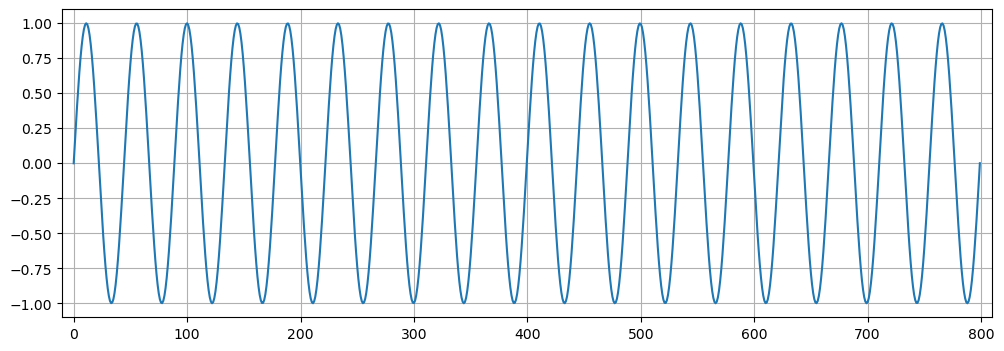

In [4]:
plt.figure(figsize=(12,4))
plt.xlim([-10,810])
plt.grid(True)
plt.plot(y.numpy());

In [5]:
test_size = 50
training_set = y[:-test_size]
test_set = y[-test_size:]

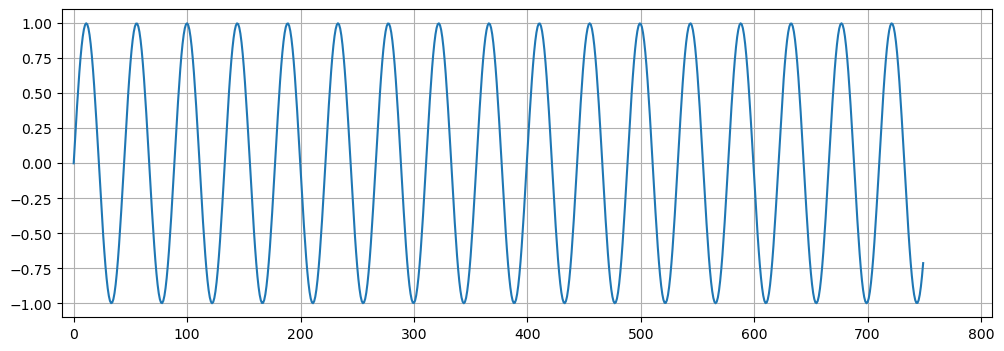

In [6]:
plt.figure(figsize=(12,4))
plt.xlim(-10,810)
plt.grid(True)
plt.plot(training_set.numpy());

In [7]:
def input_data(sequence,window_size):
    output_sequence = []
    L = len(sequence)

    for i in range(L-window_size):
        window = sequence[i:i+window_size]
        label = sequence[i+window_size:i+window_size+1]
        output_sequence.append((window,label))

    return output_sequence

In [8]:
window_size = 50
train_data = input_data(training_set,window_size)

In [9]:
len(train_data) # 800-50(Test)-50(Window Size Split) = 700

700

In [10]:
class LSTM(nn.Module):

    def __init__(self,input_size=1,hidden_size=50,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size,hidden_size)
        self.linear = nn.Linear(hidden_size,output_size)
        self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size)) # (Hidden State, Cell State)

    def forward(self,sequence):
        lstm_output, self.hidden = self.lstm(sequence.view(len(sequence),1,-1),self.hidden)
        pred = self.linear(lstm_output.view(len(sequence),-1))
        return pred[-1] # As we are only concerned about the true forecast

In [11]:
torch.manual_seed(66)

model = LSTM()
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [12]:
total_params = 0

for param in model.parameters():
    print(param.numel())
    total_params += param.numel()

print("Total LSTM model parameters:",total_params)

200
10000
200
200
50
1
Total LSTM model parameters: 10651


In [13]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

Epoch 0 -> Loss: 0.014454067684710026
Performance on test set: 0.8886235952377319


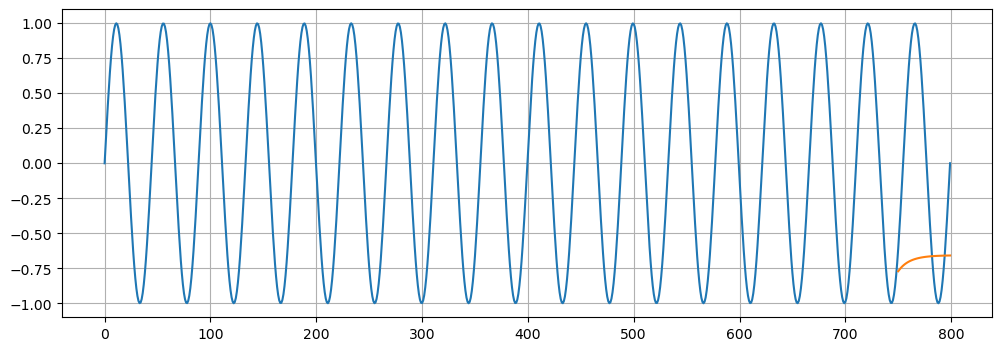

Epoch 1 -> Loss: 0.013773564249277115
Performance on test set: 0.8613131642341614


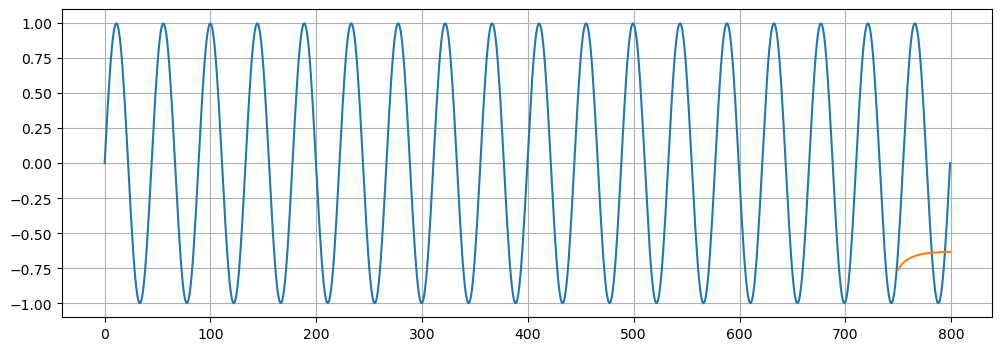

Epoch 2 -> Loss: 0.010104009881615639
Performance on test set: 0.7708957195281982


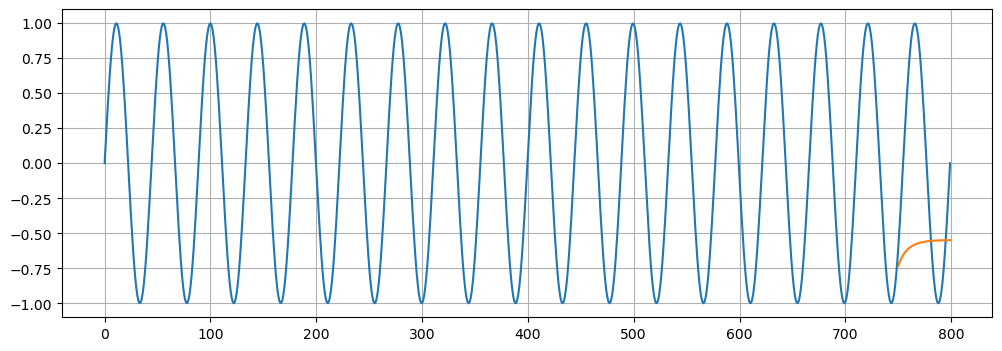

Epoch 3 -> Loss: 0.005316460505127907
Performance on test set: 0.5900532603263855


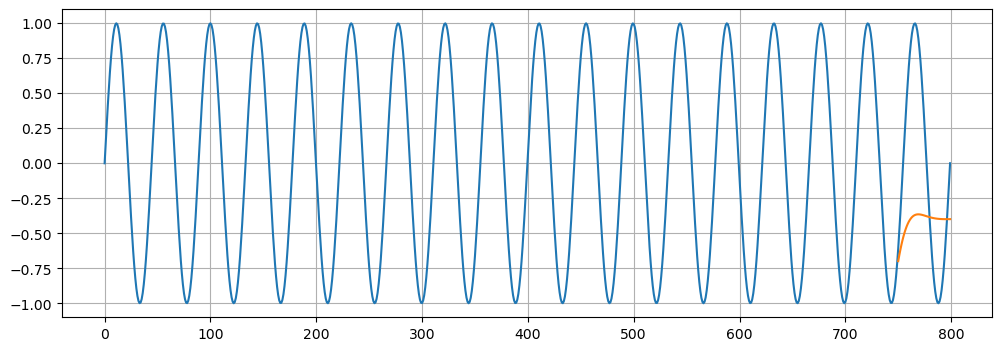

Epoch 4 -> Loss: 0.0020318201277405024
Performance on test set: 0.22677578032016754


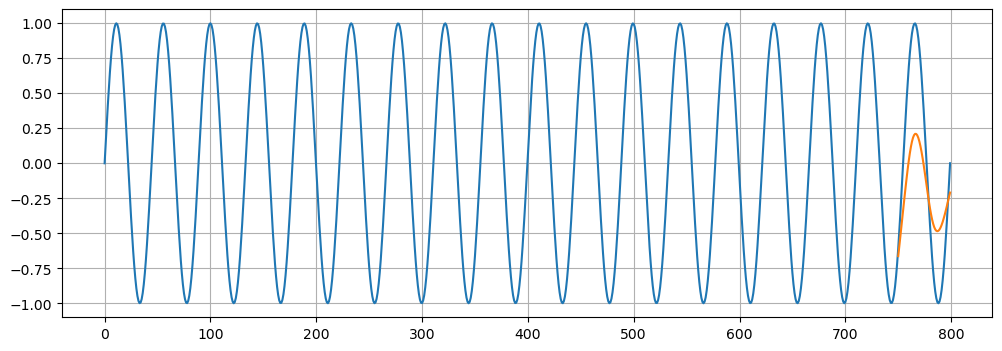

Epoch 5 -> Loss: 0.0010512482840567827
Performance on test set: 0.028438406065106392


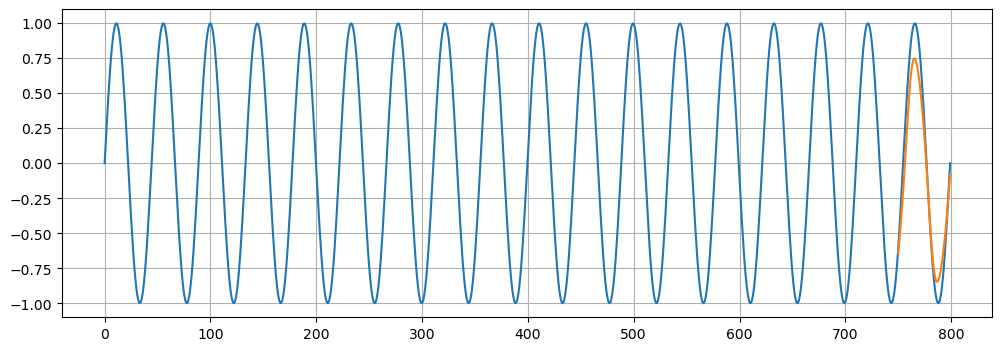

Epoch 6 -> Loss: 0.0008640335872769356
Performance on test set: 0.008234173990786076


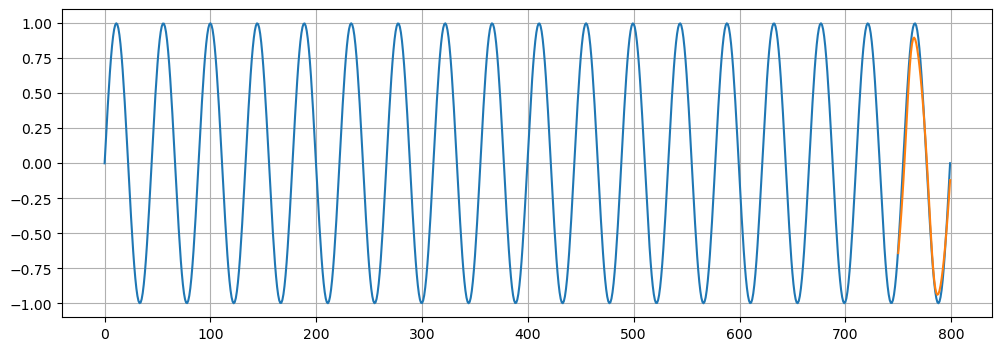

Epoch 7 -> Loss: 0.0008270425023511052
Performance on test set: 0.006212600972503424


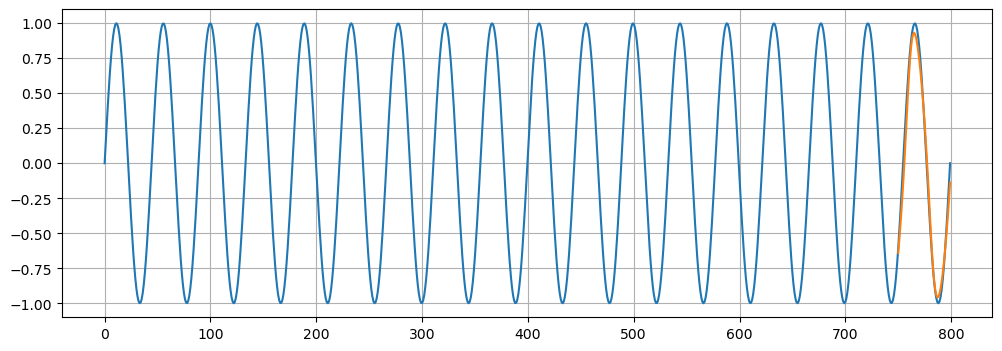

Epoch 8 -> Loss: 0.0008107399917207658
Performance on test set: 0.005771405529230833


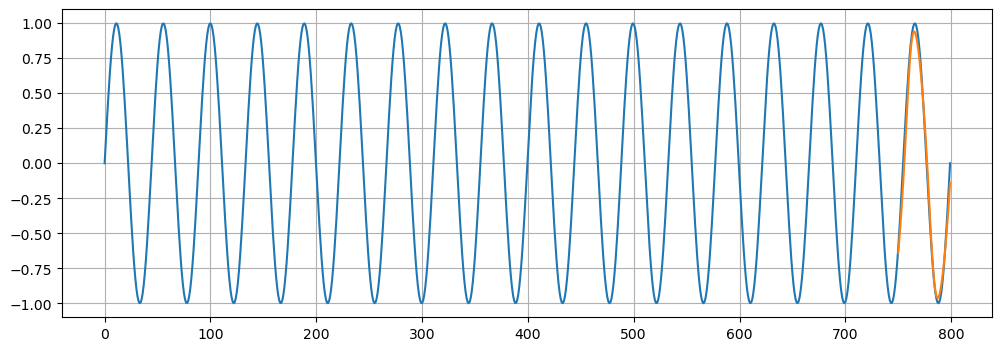

Epoch 9 -> Loss: 0.0007931353175081313
Performance on test set: 0.0054953936487436295


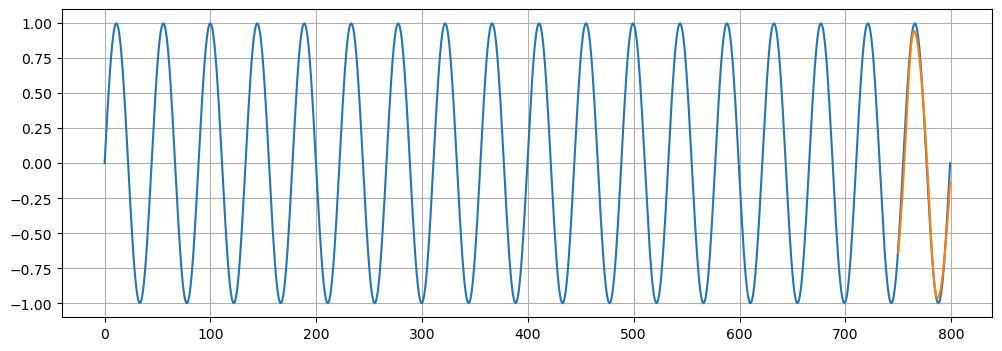

In [14]:
epochs = 10

forecast_horizon = 50

for i in range(epochs):

    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size)) # Reset the hidden and cell states

        y_pred = model(seq)
        loss = criterion(y_pred,y_train)
        loss.backward()
        optimizer.step()

    print(f"Epoch {i} -> Loss: {loss.item()}")
    predictions = training_set[-window_size:].tolist()

    for f in range(forecast_horizon):
        seq = torch.FloatTensor(predictions[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size)) # Reset the hidden and cell states
            pred = model(seq)
            predictions.append(pred.item())

    loss = criterion(torch.tensor(predictions[-window_size:]),y[750:])
    print(f"Performance on test set: {loss.item()}")

    plt.figure(figsize=(12,4))
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(750,800),predictions[-window_size:])
    plt.show();

In [15]:
# Retrain the model on all data
epochs = 20
window_size = 50
forecast_horizon = 50

all_data = input_data(y,window_size)
len(all_data)

750

In [16]:
start_time = time.time()

for i in range(epochs):
    for seq, y_train in all_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
        y_pred = model(seq)
        loss = criterion(y_pred,y_train)
        loss.backward()
        optimizer.step()

    print(f"Epoch {i} -> Loss: {loss.item()}")

print(f"Time elapsed in LSTM model training: {(time.time()-start_time)/60} minutes.")

Epoch 0 -> Loss: 3.784729778999463e-05
Epoch 1 -> Loss: 3.778663449338637e-05
Epoch 2 -> Loss: 3.736955113708973e-05
Epoch 3 -> Loss: 3.722976543940604e-05
Epoch 4 -> Loss: 3.733130142791197e-05
Epoch 5 -> Loss: 3.7582096410915256e-05
Epoch 6 -> Loss: 3.791167910094373e-05
Epoch 7 -> Loss: 3.8267029594862834e-05
Epoch 8 -> Loss: 3.862107405439019e-05
Epoch 9 -> Loss: 3.8946429413044825e-05
Epoch 10 -> Loss: 3.923505573766306e-05
Epoch 11 -> Loss: 3.947474033338949e-05
Epoch 12 -> Loss: 3.9665959775447845e-05
Epoch 13 -> Loss: 3.980422479799017e-05
Epoch 14 -> Loss: 3.989264587289654e-05
Epoch 15 -> Loss: 3.9930488128447905e-05
Epoch 16 -> Loss: 3.992164056398906e-05
Epoch 17 -> Loss: 3.986648516729474e-05
Epoch 18 -> Loss: 3.977170490543358e-05
Epoch 19 -> Loss: 3.964231291320175e-05
Time elapsed in LSTM model training: 0.654444936911265 minutes.


## Forecast into Unknown Future

In [24]:
predictions = y[-window_size:].tolist()

model.eval() 

for i in range(forecast_horizon):
    preds = torch.FloatTensor(predictions[-window_size:])

    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),torch.zeros(1,1,model.hidden_size))
        predictions.append(model(preds).item())

print(predictions)

[-0.6071311831474304, -0.488959938287735, -0.36100831627845764, -0.2258356213569641, -0.08614566922187805, 0.05526740476489067, 0.19557499885559082, 0.33197060227394104, 0.46172600984573364, 0.5822457075119019, 0.6911191344261169, 0.7861684560775757, 0.8654924631118774, 0.9275074005126953, 0.9709660410881042, 0.9950029850006104, 0.9991374611854553, 0.9832867383956909, 0.9477678537368774, 0.8932912945747375, 0.8209467530250549, 0.7321812510490417, 0.6287702918052673, 0.5127824544906616, 0.38653764128685, 0.25256115198135376, 0.11353282630443573, -0.027766434475779533, -0.1685178130865097, -0.3058907985687256, -0.43715208768844604, -0.5596619844436646, -0.6709772944450378, -0.7688714265823364, -0.8513861894607544, -0.916871190071106, -0.9640164971351624, -0.9918791055679321, -0.9999017119407654, -0.9879238605499268, -0.9561851024627686, -0.9053202867507935, -0.8363426327705383, -0.7506393790245056, -0.6499214768409729, -0.5362035632133484, -0.41176021099090576, -0.27908068895339966, -0.1

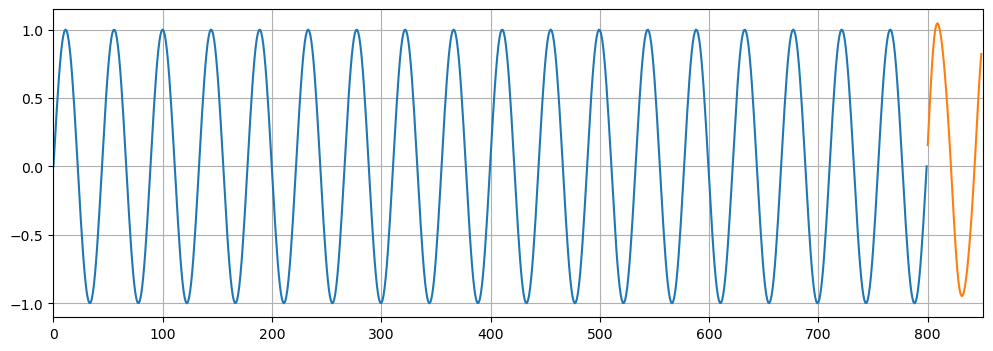

In [25]:
plt.figure(figsize=(12,4))
plt.xlim(0,851)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,800+forecast_horizon),predictions[-window_size:])
plt.show();